<a href="https://colab.research.google.com/github/BobMarques/case-meli/blob/main/case_meli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import requests
import pandas as pd

# produtos para buscar na API, mantive todos na mesma linha de 'Box TV'
lista_de_busca = ["Chromecast", "Apple TV", "Fire TV", "Roku"]

# função para rodar a API e colher os results com limite pre estabelecido de 50
def buscar_id(termo_busca):
    url = f"https://api.mercadolibre.com/sites/MLA/search?q={termo_busca}&limit=50"
    response = requests.get(url)
    if response.status_code == 200: #verifica se a conexão teve sucesso
        resultados = response.json()['results']
        ids = [produto['id'] for produto in resultados]
        return ids
    else: #se não fala que deu erro, e para qual termo
        print(f"Erro ao buscar {termo_busca}")
        return []

# pegar IDs para cada valor da 'lista_de_busca'
lista_ids = []
for termo in lista_de_busca:
    id = buscar_id(termo)
    lista_ids.extend(id)

print(f"Total de IDs: {len(lista_ids)}")

Total de IDs: 199


In [69]:
# função para pegar detalhes json do ID via API
def get_detalhes_item(item_id):
    url = f"https://api.mercadolibre.com/items/{item_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro ao buscar {item_id}")
        return None

# pegar detalhes de todos os valores do 'lista_ids'
lista_detalhes = []
for item_id in lista_ids:
    detalhes = get_detalhes_item(item_id)
    if detalhes:
        lista_detalhes.append(detalhes)

print(f"Total de detalhes: {len(lista_detalhes)}")

Total de detalhes: 199


In [70]:
# função para converter os dados JSON em CSV e salvar o arquivo
def salvar_dados_em_csv(detalhes, nome_arquivo="detalhes_produtos.csv"):
    df = pd.json_normalize(detalhes)
    df.to_csv(nome_arquivo, index=False)
    print(f"Dados salvos em: {nome_arquivo}")

salvar_dados_em_csv(lista_detalhes)

Dados salvos em: detalhes_produtos.csv


In [72]:
#analisar o formato da base e variaveis
file_path = 'detalhes_produtos.csv'

df_original = pd.read_csv(file_path, delimiter=',')
df = df_original
print(df.columns)
display(df.head())

Index(['id', 'site_id', 'title', 'seller_id', 'category_id',
       'official_store_id', 'price', 'base_price', 'original_price',
       'currency_id', 'initial_quantity', 'sale_terms', 'buying_mode',
       'listing_type_id', 'condition', 'permalink', 'thumbnail_id',
       'thumbnail', 'pictures', 'video_id', 'descriptions',
       'accepts_mercadopago', 'non_mercado_pago_payment_methods',
       'international_delivery_mode', 'seller_contact', 'coverage_areas',
       'attributes', 'listing_source', 'variations', 'status', 'sub_status',
       'tags', 'warranty', 'catalog_product_id', 'domain_id', 'parent_item_id',
       'deal_ids', 'automatic_relist', 'date_created', 'last_updated',
       'health', 'catalog_listing', 'shipping.mode', 'shipping.methods',
       'shipping.tags', 'shipping.dimensions', 'shipping.local_pick_up',
       'shipping.free_shipping', 'shipping.logistic_type',
       'shipping.store_pick_up', 'seller_address.city.id',
       'seller_address.city.name', 'sel

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,...,seller_address.state.name,seller_address.country.id,seller_address.country.name,seller_address.search_location.neighborhood.id,seller_address.search_location.neighborhood.name,seller_address.search_location.city.id,seller_address.search_location.city.name,seller_address.search_location.state.id,seller_address.search_location.state.name,seller_address.id
0,MLA1546120292,MLA,Chromecast With Google Tv De Voz 4ª Generación...,666749750,MLA352001,NaN,98999.00,98999.00,117739.0,ARS,...,Capital Federal,AR,Argentina,TUxBQkFMTTMwNTBa,Almagro,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1199959692
1,MLA1346250874,MLA,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,82274172,MLA352001,NaN,78490.00,78490.00,NaN,ARS,...,Capital Federal,AR,Argentina,TUxBQkZMTzMwNzRa,Flores,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1347426997
2,MLA1696276176,MLA,Google Chromecast 3 Full Hd Media Streaming Negro,216203805,MLA352001,NaN,89500.00,89500.00,NaN,ARS,...,Capital Federal,AR,Argentina,TUxBQkNBQjM4MDda,Caballito,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1231481192
3,MLA1388838511,MLA,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,1443311053,MLA352001,NaN,78200.00,78200.00,NaN,ARS,...,Capital Federal,AR,Argentina,TUxBQlNBTjgzMjRa,San Nicolás,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1325893788
4,MLA1703532182,MLA,Google Chromecast 4 Generación Con Google Tv H...,1328355904,MLA352001,NaN,82999.17,82999.17,99999.0,ARS,...,Capital Federal,AR,Argentina,TUxBQkJPRTQ0OTRa,Boedo,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1362769180


In [73]:
# separar variaveis mais interessantes para analisar
variaveis = [
    'title', 'category_id', 'price', 'currency_id', 'buying_mode',
    'listing_type_id', 'condition', 'accepts_mercadopago',
    'international_delivery_mode', 'status', 'warranty', 'date_created',
    'last_updated', 'shipping.mode', 'shipping.methods',
    'shipping.local_pick_up', 'shipping.free_shipping',
    'shipping.logistic_type', 'shipping.store_pick_up',
    'seller_address.state.name', 'seller_address.country.name'
]
df = df[variaveis]

In [74]:
# analisar quais variaveis possuem valores unico e valores nao nulos
resultados_analise = []
for col in df.columns:
    cont_unicos = df[col].nunique()
    cont_not_null = df[col].notnull().sum()
    resultados_analise.append((col, cont_unicos, cont_not_null))

# converter os resultados para df
analise_df = pd.DataFrame(resultados_analise, columns=["Variável", "Valores Únicos", "Valores Não Nulos"])

display(analise_df)


,Variável,Valores Únicos,Valores Não Nulos
0,title,179,199
1,category_id,1,199
2,price,148,199
3,currency_id,1,199
4,buying_mode,1,199
5,listing_type_id,3,199
6,condition,2,199
7,accepts_mercadopago,1,199
8,international_delivery_mode,1,199
9,status,1,199


In [75]:
# com o codigo anterior vemos que das colunas selecionadas, apenas 'warranty' possui um valor nulo. e várias possuem apenas 1 tipo de valor

# separar colunas com valores únicos = 1
colunas_unicos_1 = analise_df[analise_df['Valores Únicos'] == 1]['Variável'].tolist()
colunas_mais_de_1 = analise_df[analise_df['Valores Únicos'] > 1]['Variável'].tolist()

# criar dfs separados
df_unicos_1 = df[colunas_unicos_1]
df_mais_de_1 = df[colunas_mais_de_1]

# mostrar df de valores unicos
display(df_unicos_1.iloc[[0]])

,category_id,currency_id,buying_mode,accepts_mercadopago,international_delivery_mode,status,shipping.mode,shipping.methods,shipping.store_pick_up,seller_address.country.name
0,MLA352001,ARS,buy_it_now,True,none,active,me2,[],False,Argentina


In [76]:
# com o codigo acima já vemos que todas as listagens estão em ARS e na Argentina, 'compre agora', aceitam mercado pago,
# não tem entrega internacional, enviados pelo modo 'me2' e não podem ser retirados na loja.

# agora vamos analisar as demais variaveis e categorizar a colunas de 'title'
def categorizar_titulo(titulo):
    if 'Chromecast' in titulo:
        return 'Chromecast'
    elif 'Amazon' in titulo:
        return 'Fire TV'
    elif 'Apple' in titulo:
        return 'Apple TV'
    elif 'Roku' in titulo:
        return 'Roku'
    else:
        return 'Outros'

# aplicar a função para categorizar a coluna 'title'
df_mais_de_1.loc[:, 'categoria'] = df_mais_de_1['title'].apply(categorizar_titulo)

# verificar os valores
print(df_mais_de_1['categoria'].value_counts())

display(df_mais_de_1)

categoria
Apple TV      51
Chromecast    50
Roku          50
Fire TV       46
Outros         2
Name: count, dtype: int64


<ipython-input-76-f27c975da9cd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mais_de_1.loc[:, 'categoria'] = df_mais_de_1['title'].apply(categorizar_titulo)


,title,price,listing_type_id,condition,warranty,date_created,last_updated,shipping.local_pick_up,shipping.free_shipping,shipping.logistic_type,seller_address.state.name,categoria
0,Chromecast With Google Tv De Voz 4ª Generación...,98999.00,gold_special,new,Garantía de fábrica: 12 meses,2023-10-25T14:13:16.000Z,2024-06-03T02:20:48.469Z,False,True,fulfillment,Capital Federal,Chromecast
1,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,78490.00,gold_special,new,Garantía del vendedor: 12 meses,2023-02-14T20:42:08.000Z,2024-06-03T02:20:49.000Z,False,True,xd_drop_off,Capital Federal,Chromecast
2,Google Chromecast 3 Full Hd Media Streaming Negro,89500.00,gold_pro,new,Garantía de fábrica: 12 meses,2024-03-08T11:29:36.000Z,2024-06-03T02:25:49.783Z,False,True,fulfillment,Capital Federal,Chromecast
3,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,78200.00,gold_special,new,Garantía del vendedor: 6 meses,2023-09-19T15:59:27.000Z,2024-06-03T01:55:29.000Z,False,True,drop_off,Capital Federal,Chromecast
4,Google Chromecast 4 Generación Con Google Tv H...,82999.17,gold_special,new,Garantía del vendedor: 6 meses,2024-03-14T15:35:33.000Z,2024-06-03T01:32:48.000Z,True,True,xd_drop_off,Capital Federal,Chromecast
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Roku Express 3960 Estándar Full Hd Streaming Y...,69998.00,gold_special,new,Garantía del vendedor: 6 meses,2023-05-10T16:40:54.000Z,2024-06-01T21:06:00.000Z,True,True,cross_docking,Capital Federal,Roku
195,Roku Express 3930 Full Hd 1080p C Control Netf...,69999.00,gold_special,new,Sin garantía,2023-03-16T13:15:09.000Z,2024-05-31T18:07:00.000Z,False,True,cross_docking,Buenos Aires,Roku
196,Roku Express 4k Streaming Tv Uhd Hdr Con Contr...,99999.00,gold_special,new,Garantía del vendedor: 12 meses,2022-06-16T17:22:22.000Z,2024-06-01T02:00:46.000Z,False,True,cross_docking,Buenos Aires,Roku
197,Roku Le Streaming 3930s4 Full Hd 32mb Negro Y...,101700.00,gold_special,new,Garantía de fábrica: 6 meses,2023-12-20T17:36:36.000Z,2024-06-03T01:37:22.000Z,True,True,cross_docking,Capital Federal,Roku


In [77]:
# limpar a base
df_filtrado = df_mais_de_1.dropna(subset=['warranty'])
df_filtrado = df_filtrado[df_filtrado['categoria'] != 'Outros']

print(df_filtrado['categoria'].value_counts())
display(df_filtrado)

categoria
Apple TV      51
Roku          50
Chromecast    49
Fire TV       46
Name: count, dtype: int64


,title,price,listing_type_id,condition,warranty,date_created,last_updated,shipping.local_pick_up,shipping.free_shipping,shipping.logistic_type,seller_address.state.name,categoria
0,Chromecast With Google Tv De Voz 4ª Generación...,98999.00,gold_special,new,Garantía de fábrica: 12 meses,2023-10-25T14:13:16.000Z,2024-06-03T02:20:48.469Z,False,True,fulfillment,Capital Federal,Chromecast
1,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,78490.00,gold_special,new,Garantía del vendedor: 12 meses,2023-02-14T20:42:08.000Z,2024-06-03T02:20:49.000Z,False,True,xd_drop_off,Capital Federal,Chromecast
2,Google Chromecast 3 Full Hd Media Streaming Negro,89500.00,gold_pro,new,Garantía de fábrica: 12 meses,2024-03-08T11:29:36.000Z,2024-06-03T02:25:49.783Z,False,True,fulfillment,Capital Federal,Chromecast
3,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,78200.00,gold_special,new,Garantía del vendedor: 6 meses,2023-09-19T15:59:27.000Z,2024-06-03T01:55:29.000Z,False,True,drop_off,Capital Federal,Chromecast
4,Google Chromecast 4 Generación Con Google Tv H...,82999.17,gold_special,new,Garantía del vendedor: 6 meses,2024-03-14T15:35:33.000Z,2024-06-03T01:32:48.000Z,True,True,xd_drop_off,Capital Federal,Chromecast
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Roku Express 3960 Estándar Full Hd Streaming Y...,69998.00,gold_special,new,Garantía del vendedor: 6 meses,2023-05-10T16:40:54.000Z,2024-06-01T21:06:00.000Z,True,True,cross_docking,Capital Federal,Roku
195,Roku Express 3930 Full Hd 1080p C Control Netf...,69999.00,gold_special,new,Sin garantía,2023-03-16T13:15:09.000Z,2024-05-31T18:07:00.000Z,False,True,cross_docking,Buenos Aires,Roku
196,Roku Express 4k Streaming Tv Uhd Hdr Con Contr...,99999.00,gold_special,new,Garantía del vendedor: 12 meses,2022-06-16T17:22:22.000Z,2024-06-01T02:00:46.000Z,False,True,cross_docking,Buenos Aires,Roku
197,Roku Le Streaming 3930s4 Full Hd 32mb Negro Y...,101700.00,gold_special,new,Garantía de fábrica: 6 meses,2023-12-20T17:36:36.000Z,2024-06-03T01:37:22.000Z,True,True,cross_docking,Capital Federal,Roku


In [78]:
# analisar preço por categoria e condição
preco_por_categoria_condicao = df_filtrado.groupby(['categoria', 'condition'])['price'].describe()

display(preco_por_categoria_condicao)

count           mean            std       min       25%  \
categoria  condition                                                            
Apple TV   new         15.0  430838.066667  173431.481093  239990.0  269994.5   
           used        36.0  147140.027222  109167.820068   20000.0   73750.0   
Chromecast new         49.0   82913.273673   18247.018261   47990.0   78490.0   
Fire TV    new         46.0  100203.463696   41833.517834   64748.0   80990.0   
Roku       new         50.0   86781.290000   22574.369797   59018.0   69998.0   

                             50%       75%       max  
categoria  condition                                  
Apple TV   new        404999.000  528500.0  763400.0  
           used       120000.000  182500.0  469000.0  
Chromecast new         83219.000   95999.0  129990.0  
Fire TV    new         89164.500  105278.0  325000.0  
Roku       new         72599.025   99999.0  141999.0

In [79]:
# ja vemos pelo codigo anterior que apenas Apple TV possui listagens 'Usados' e é a grande maioria.
# o mais barato seria Apple TV ARS 20000 porém usado. e o mais barato de Novos seria o Chromecast ARS 47990.

# agora vamos analisar apenas os 'novos' retirando Outliers para uma comparação mais justa de faixa de preço
df_novos = df_filtrado[df_filtrado['condition'] == 'new']

# remover outliers usando o método IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= lim_inferior) & (df[coluna] <= lim_superior)]

# remover outliers da coluna 'price' para cada categoria
df_novos_sem_outliers = df_novos.groupby('categoria').apply(lambda x: remover_outliers(x, 'price')).reset_index(drop=True)

# analisar preço por categoria sem outliers
analise_preco_novos_sem_outliers = df_novos_sem_outliers.groupby('categoria')['price'].describe()


display(analise_preco_novos_sem_outliers)

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
Apple TV,15.0,430838.066667,173431.481093,239990.00,269994.50,404999.000,528500.0000,763400.0
Chromecast,43.0,85785.846744,13438.306176,53549.15,79099.56,83999.000,97006.0600,112000.0
Fire TV,40.0,88033.155750,14689.318189,64748.00,76134.00,88899.000,94324.0375,125999.0
Roku,50.0,86781.290000,22574.369797,59018.00,69998.00,72599.025,99999.0000,141999.0


In [54]:
# por fim vemos que apple tv está em um patamar muito superior de preço para produtos novos. Chromecast e Roku são as opções mais baratas
# mas Fire TV também fica bem próximo desses 2.

In [82]:
# converter a coluna 'date_created' para datetime
df_filtrado['date_created'] = pd.to_datetime(df_filtrado['date_created'])

# análise descritiva das datas de criação por categoria
descricao_datas_simples = df_filtrado.groupby('categoria')['date_created'].describe()

display(descricao_datas)

,count,mean,min,25%,50%,75%,max
categoria,,,,,,,
Apple TV,51,2024-01-01 07:39:02.159097856+00:00,2022-03-24 21:24:01+00:00,2023-12-07 11:48:40+00:00,2024-04-08 04:08:16+00:00,2024-05-11 19:30:04+00:00,2024-06-02 22:45:47.761000+00:00
Chromecast,48,2023-07-22 04:22:06.708708096+00:00,2019-03-27 20:24:22+00:00,2023-03-03 06:12:44.249999872+00:00,2023-12-16 06:56:02.948499968+00:00,2024-03-28 19:31:27.750000128+00:00,2024-05-30 17:23:19.588000+00:00
Fire TV,46,2023-04-23 11:59:57.732609024+00:00,2020-08-21 18:19:01+00:00,2022-09-29 17:06:46.750000128+00:00,2023-06-12 19:48:03+00:00,2023-12-25 14:06:22.976000+00:00,2024-06-01 15:34:25.303000+00:00
Roku,48,2023-05-20 04:33:01.258979328+00:00,2018-07-06 18:47:33+00:00,2023-03-12 21:52:58+00:00,2023-07-20 04:25:29.500000+00:00,2024-04-22 22:08:43.249999872+00:00,2024-05-30 19:36:44.159000+00:00


In [85]:
# analisando as datas de criação dos anuncios, pelo percentil 75. temos que o Fire TV tem poucos anuncios novos
# (os 25% mais novos - acima do percentil 75 - pegam 2023 ainda). os demais ficam parecidos de março-maio 2024.

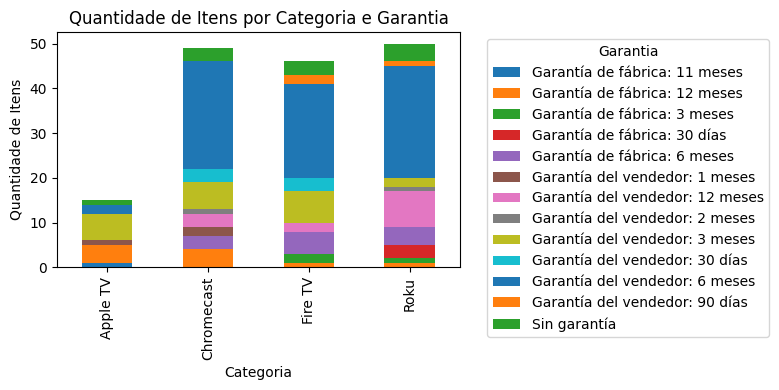

In [88]:
# analisar com grafico as categorias por garantia (dos produtos novos - sem usados)

import matplotlib.pyplot as plt

df_novos = df_filtrado[df_filtrado['condition'] == 'new']

# contar a quantidade de itens em cada categoria e garantia
quantidade_por_categoria_e_garantia = df_novos.groupby(['categoria', 'warranty']).size().reset_index(name='quantidade')

# pivotar o df para o formato adequado para o gráfico
pivot_df = quantidade_por_categoria_e_garantia.pivot(index='categoria', columns='warranty', values='quantidade').fillna(0)

# criar o gráfico de coluna empilhada
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 4))

# adicionar título e rótulos
plt.title('Quantidade de Itens por Categoria e Garantia')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Itens')
plt.legend(title='Garantia', bbox_to_anchor=(1.05, 1), loc='upper left')

# exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# de principais conclusões temos:

# todas as listagens obtidas pelas API estão em ARS e na Argentina, 'compre agora', aceitam mercado pago,
# não tem entrega internacional, enviados pelo modo 'me2' e não podem ser retirados na loja.

# apenas Apple TV possui listagens 'Usados' na amostra, e é a grande maioria dentro de Apple TV.
# o mais barato seria Apple TV (ARS 20000) porém usado. e o mais barato de 'Novos' seria o Chromecast (ARS 47990).

# Apple tv está em um patamar muito superior de preço para produtos novos. Chromecast e Roku são as opções mais baratas
# mas Fire TV também fica bem próximo desses dois.

# analisando as datas de criação dos anúncios, pelo percentil 75: temos que o Fire TV tem poucos anúncios novos
# os 25% mais novos - acima do percentil 75 - pegam 2023 ainda. os demais produtos ficam parecidos entre março-maio 2024.

# as garantias dos produtos novos em sua maioria são 'Garantia do vendedor: 6 meses'